In [1]:
import pandas as pd
import numpy as np
import scipy as sp

from scipy.cluster import hierarchy
import matplotlib.pyplot as plt

In [2]:
clusters = pd.read_csv('/Users/martin/Dropbox/Academia/Data/Geo/Amsterdam/clustering/200309_clusters_complete_n30.csv', index_col=0)

In [3]:
data = pd.read_parquet('/Users/martin/Dropbox/Academia/Data/Geo/Amsterdam/clustering/context_data_norm.parquet')

In [7]:
data

,stcOri_meanIQ3,stcOri_rangeIQ3,stcOri_theilID3,sdcLAL_meanIQ3,sdcLAL_rangeIQ3,sdcLAL_theilID3,sdcAre_meanIQ3,sdcAre_rangeIQ3,sdcAre_theilID3,sscCCo_meanIQ3,...,xcnSCl_simpson,mtdMDi_simpson,lddNDe_simpson,linWID_simpson,lddRea_simpson,lddARe_simpson,sddAre_simpson,midRea_simpson,midAre_simpson,cluster
uID,,,,,,,,,,,,,,,,,,,,,
0,0.585140,-0.896398,-0.489475,7.133090,-1.091901,-1.057916,16.668079,-0.238053,-1.152259,6.014979,...,1.435612,2.483693,1.947502,1.867760,2.218971,1.541849,1.403983,2.810304,1.613008,15
1,0.585140,-0.896398,-0.489475,7.133090,-1.091901,-1.057916,16.668079,-0.238053,-1.152259,6.014979,...,1.435612,2.483693,1.947502,1.867760,2.218971,1.541849,1.403983,2.810304,1.613008,15
2,0.571235,1.201597,-0.115102,4.994748,1.363017,-0.756882,6.082546,2.874121,-0.867541,2.367613,...,1.435612,2.483693,1.947502,1.867760,0.237811,-0.275548,-0.457394,0.608711,-0.260924,15
3,0.943433,1.084128,-0.198643,2.919743,2.612026,1.364034,2.640811,3.506598,0.911405,2.538624,...,1.435612,2.483693,1.947502,1.867760,2.218971,1.541849,1.403983,2.810304,1.613008,15
4,0.571235,1.201597,-0.115102,4.994748,1.363017,-0.756882,6.082546,2.874121,-0.867541,2.367613,...,1.435612,2.483693,1.947502,1.867760,0.237811,-0.275548,-0.457394,0.608711,-0.260924,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19452,1.431831,0.258860,-0.453472,1.422329,2.160767,1.044623,-0.034803,-0.196324,-0.227110,-0.932315,...,-0.965272,0.605287,1.947502,1.867760,0.203535,-0.645944,-0.489598,2.213055,1.104647,12
19453,1.390788,0.275483,-0.452804,1.457578,2.238153,1.138601,0.064791,0.219800,0.579435,-0.182882,...,-1.117181,0.893285,1.947502,1.867760,-0.056267,-0.858392,-0.733692,1.630388,1.074985,12
19454,1.737126,-0.577250,-0.471851,0.642903,2.346958,1.932596,-0.055894,0.166560,1.457609,-0.210482,...,-1.038957,-0.885990,1.761087,1.506825,-1.042921,-0.932765,-0.871893,-0.345487,-0.591430,22


In [8]:
group = data.groupby('cluster').median()

In [9]:
group

,stcOri_meanIQ3,stcOri_rangeIQ3,stcOri_theilID3,sdcLAL_meanIQ3,sdcLAL_rangeIQ3,sdcLAL_theilID3,sdcAre_meanIQ3,sdcAre_rangeIQ3,sdcAre_theilID3,sscCCo_meanIQ3,...,ldsCDL_simpson,xcnSCl_simpson,mtdMDi_simpson,lddNDe_simpson,linWID_simpson,lddRea_simpson,lddARe_simpson,sddAre_simpson,midRea_simpson,midAre_simpson
cluster,,,,,,,,,,,,,,,,,,,,,
0,0.106805,-0.629118,-0.470484,-0.396153,-0.283689,-0.045183,-0.255262,-0.290405,-0.013851,-0.284808,...,0.524823,-0.686606,-0.278787,-0.242732,-0.297330,-0.523449,-0.317034,-0.375186,-0.603026,-0.530612
1,0.293870,-0.629003,-0.450115,-0.358330,-0.546018,-0.562124,-0.252072,-0.322662,-0.554003,-0.524163,...,0.090920,-0.369029,-0.218091,-0.138322,-0.100977,-0.118707,-0.150114,-0.024652,-0.170042,-0.108667
2,-0.027888,0.453840,-0.234272,0.082606,0.296068,0.360597,-0.117277,-0.076287,0.614890,0.366000,...,-0.394470,-0.735678,-0.671118,-0.669923,-0.678971,-0.615384,-0.553623,-0.542246,-0.511941,-0.571945
3,0.130293,1.124173,-0.082971,0.712468,1.169540,0.836993,0.282131,0.407996,0.639446,1.578844,...,1.264823,1.435612,2.279076,1.947502,1.867760,2.218971,1.541849,1.186951,2.810304,1.613008
4,-0.736697,-0.686459,-0.432655,-0.566041,-0.821622,-0.879820,-0.292067,-0.392449,-0.940762,-0.513084,...,1.264823,-0.523382,-0.021812,0.172467,0.110308,-0.207950,-0.051200,0.108465,-0.239009,-0.221261
5,0.083082,0.113367,-0.336469,-0.453074,-0.439201,-0.292969,-0.245009,-0.291594,-0.193774,0.176617,...,-0.330943,-0.365511,-0.372376,-0.290139,-0.283118,-0.512578,-0.460639,-0.397206,-0.450011,-0.442279
6,0.370466,-0.327501,-0.415442,-0.160187,-0.186530,-0.059600,-0.181715,-0.229844,-0.122108,-0.088760,...,-0.703489,-0.123907,-0.712104,-0.338748,-0.289114,-0.744473,-1.039422,-0.869293,-0.527008,-0.885475
7,-0.289396,-0.822799,-0.475973,-0.370834,-0.602989,-0.690669,-0.271350,-0.341134,-0.607908,-0.853656,...,-0.760299,1.191363,-0.203598,-0.285609,-0.282002,-0.322259,0.039104,0.209836,-0.292567,0.025950
8,0.153892,0.578172,-0.069591,3.577712,2.446236,0.218792,3.443673,3.891295,0.196479,2.448966,...,-1.373076,-0.074734,-1.071631,-0.397655,-0.301952,1.884651,-1.237746,-1.506372,1.462630,-1.297744


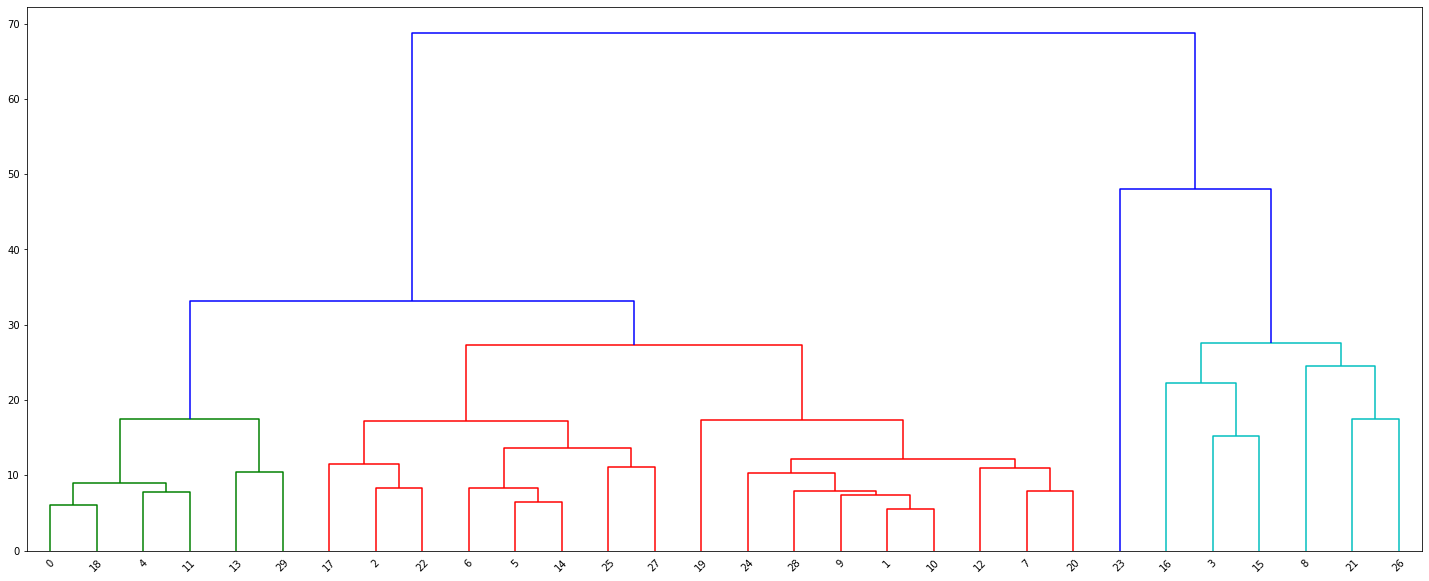

In [11]:
Z = hierarchy.linkage(group, 'ward')
plt.figure(figsize=(25, 10))
dn = hierarchy.dendrogram(Z, color_threshold=30, labels=group.index)
plt.savefig('200310_dengrogram_n30.svg')

In [6]:
import seaborn as sns
sns.set(context="paper", style="ticks", rc={'patch.force_edgecolor': False})

In [4]:
group = data.groupby('cluster').mean()
Z = hierarchy.linkage(group, 'ward')


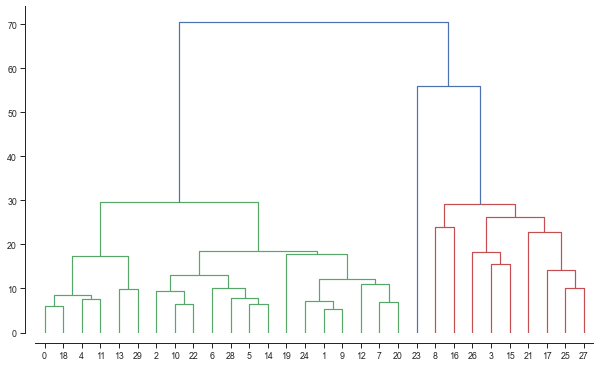

In [9]:
plt.figure(figsize=(10, 6))
dn = hierarchy.dendrogram(Z, color_threshold=30, labels=group.index)
sns.despine(offset=10)
plt.savefig('figures/200507_dengrogram_n30.svg')
plt.savefig('figures/200507_dengrogram_n30.png')

In [5]:
import scipy
distances = scipy.spatial.distance.squareform(hierarchy.cophenet(Z))

In [35]:
distances[1][23]

70.56709222798568